# Versuch 212 - Zähigkeit von Flüssigkeiten

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as scp
import matplotlib.mlab as mlab
from scipy.stats import norm
from scipy.optimize import curve_fit
import uncertainties as unc
import uncertainties.unumpy as unumpy
from uncertainties import umath
from uncertainties import ufloat
from tabulate import tabulate
%matplotlib inline

## Bestimmung der Viskosität nach Stokes mit einem Kugelfallviskosimeter

Äußere Parameter eintragen:

In [2]:
T_f = unumpy.uarray(22.0, 0.5) #[°C]
d_F = 75 #[mm]
rho_K = unumpy.uarray(1.385, 0.015) #[g/cm^3]
s_200 = unumpy.uarray(200, 5) #[mm]
s_50 = unumpy.uarray(50, 1) #[mm]
R_F = d_F/2 #[mm]
r = unumpy.uarray(np.arange(4.5,0,-0.5), 0.025/2) #[mm]
print(r)

[4.5+/-0.0125 4.0+/-0.0125 3.5+/-0.0125 3.0+/-0.0125 2.5+/-0.0125
 2.0+/-0.0125 1.5+/-0.0125 1.0+/-0.0125 0.5+/-0.0125]


Messwerte eintragen:

In [3]:
t_9_1 = np.array([6.02, 5.73, 5.84, 5.68, 5.89])
t_8_1 = np.array([7.50, 7.28, 7.32, 7.23, 7.15])
t_7_1 = np.array([9.01, 8.70, 9.04, 8.62, 8.70])
t_6_1 = np.array([12.36, 12.01, 12.14, 12.04, 12.00])
t_5_1 = np.array([4.18, 4.26, 4.21, 3.76, 3.87])
t_4_1 = np.array([5.84, 5.95, 6.28, 6.43, 5.60])
t_3_1 = np.array([10.10, 10.20, 10.42, 10.84, 10.28])
t_2_1 = np.array([22.04, 18.70, 21.42, 21.61, 23.34])
t_1_1 = np.array([73.21, 73.10, 71.23, 70.22, 77.10])

Durchschnittszeit berechnen:

In [4]:
t_9 = unumpy.uarray(t_9_1.mean(), umath.sqrt(0.25**2 + t_9_1.std()**2))
t_8 = unumpy.uarray(t_8_1.mean(), umath.sqrt(0.25**2 + t_8_1.std()**2))
t_7 = unumpy.uarray(t_7_1.mean(), umath.sqrt(0.25**2 + t_7_1.std()**2))
t_6 = unumpy.uarray(t_6_1.mean(), umath.sqrt(0.25**2 + t_6_1.std()**2))
t_5 = unumpy.uarray(t_5_1.mean(), umath.sqrt(0.25**2 + t_5_1.std()**2))
t_4 = unumpy.uarray(t_4_1.mean(), umath.sqrt(0.25**2 + t_4_1.std()**2))
t_3 = unumpy.uarray(t_3_1.mean(), umath.sqrt(0.25**2 + t_3_1.std()**2))
t_2 = unumpy.uarray(t_2_1.mean(), umath.sqrt(0.25**2 + t_2_1.std()**2))
t_1 = unumpy.uarray(t_1_1.mean(), umath.sqrt(0.25**2 + t_1_1.std()**2))

Sinkgeschwindigkeiten berechnen:

In [5]:
t = np.array([t_9, t_8, t_7, t_6, t_5, t_4, t_3, t_2, t_1])
s = np.array([s_200, s_200, s_200, s_200, s_50, s_50, s_50, s_50, s_50])

In [6]:
v = s/t #[mm/s]
print(v)

[34.29355281207133+/-1.8428113084207598
 27.41228070175438+/-1.2426723063265657
 22.691173133651013+/-0.9690257099994161
 16.51527663088357+/-0.5659859426031719
 12.327416173570022+/-1.0064844113342928
 8.305647840531561+/-0.5636041348518225
 4.822530864197531+/-0.1929917748837006
 2.3340491083932404+/-0.17388991989516692
 0.6851943211094665+/-0.026117830504753286]


Trage Geschwindigkeit gegenüber Radiusquadrat auf:

In [7]:
r_2 = r**2
print(r_2)

[20.25+/-0.1125 16.0+/-0.1 12.25+/-0.08750000000000001
 9.0+/-0.07500000000000001 6.25+/-0.0625 4.0+/-0.05
 2.25+/-0.037500000000000006 1.0+/-0.025 0.25+/-0.0125]


In [8]:
v_table = []
r_2_table =[]

for i in range(0,9):
    v_table.append('{:P}'.format(v[i]))
    
for i in range(0,9):
    r_2_table.append('{:P}'.format(r_2[i]))
                   
#print(v_table)
#print(r_2_table)

table_1 = np.array([r_2_table, v_table]).T

In [9]:
print(tabulate(np.flip(table_1,0), tablefmt="latex", headers=["r^2 [mm^2]", "v_quer [mm/s]"]))

\begin{tabular}{ll}
\hline
 r\^{}2 [mm\^{}2]   & v\_quer [mm/s]   \\
\hline
 0.250±0.013  & 0.685±0.026     \\
 1.000±0.025  & 2.33±0.17       \\
 2.25±0.04    & 4.82±0.19       \\
 4.00±0.05    & 8.3±0.6         \\
 6.25±0.06    & 12.3±1.0        \\
 9.00±0.08    & 16.5±0.6        \\
 12.25±0.09   & 22.7±1.0        \\
 16.00±0.10   & 27.4±1.2        \\
 20.25±0.11   & 34.3±1.8        \\
\hline
\end{tabular}


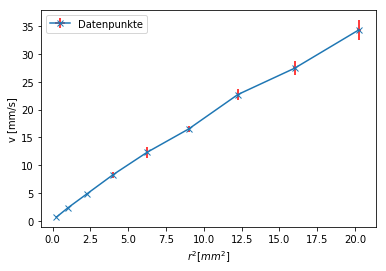

In [10]:
plt.errorbar(unumpy.nominal_values(r_2), unumpy.nominal_values(v), xerr=unumpy.std_devs(r_2), yerr=unumpy.std_devs(v), marker='x', label='Datenpunkte', ecolor='red')
plt.xlabel(r'$r^2 [mm^2]$')
plt.ylabel('v [mm/s]')
plt.legend()

Berechne Korrekturfaktor:

In [11]:
def lamb(r_in):
    return (1 + 2.1 * r_in/R_F)

In [12]:
corr = np.array(lamb(r))
print(corr)

v_corr = v*corr

[1.252+/-0.0007000000000000001 1.224+/-0.0007000000000000001
 1.196+/-0.0007000000000000001 1.168+/-0.0007000000000000001
 1.1400000000000001+/-0.0007000000000000001 1.112+/-0.0007000000000000001
 1.084+/-0.0007000000000000001 1.056+/-0.0007000000000000001
 1.028+/-0.0007000000000000001]


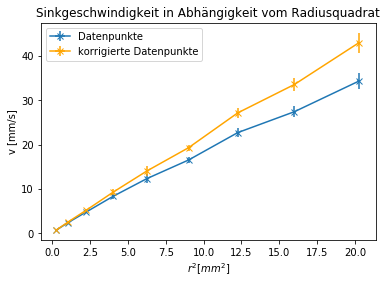

In [13]:
plt.errorbar(unumpy.nominal_values(r_2), unumpy.nominal_values(v), xerr=unumpy.std_devs(r_2), yerr=unumpy.std_devs(v), marker='x', label='Datenpunkte')
plt.errorbar(unumpy.nominal_values(r_2), unumpy.nominal_values(v_corr), xerr=unumpy.std_devs(r_2), yerr=unumpy.std_devs(v_corr), marker='x', label='korrigierte Datenpunkte', color='orange')
plt.title('Sinkgeschwindigkeit in Abhängigkeit vom Radiusquadrat')
plt.xlabel(r'$r^2 [mm^2]$')
plt.ylabel('v [mm/s]')
plt.legend()
#plt.grid()
#plt.ylim((0,60000))
#plt.xlim((250,900))
#plt.savefig("Himmelslicht.pdf", format="pdf")

Führe Kurvenfit mit linearem Teil durch:

In [14]:
def linear(x,a,b):
    return a*x+b

In [15]:
para=[2.2,0]
popt, pcov = curve_fit(linear, unumpy.nominal_values(r_2)[4:9], unumpy.nominal_values(v_corr)[4:9], sigma=unumpy.std_devs(v_corr)[4:9], p0=para)

a = unumpy.uarray(popt[0], np.sqrt(pcov[0][0]))

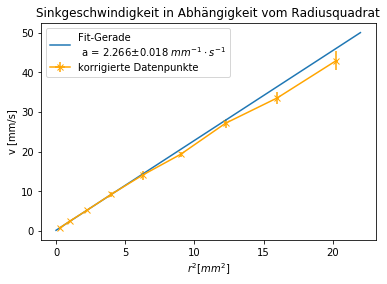

In [16]:
plt.errorbar(unumpy.nominal_values(r_2), unumpy.nominal_values(v_corr), xerr=unumpy.std_devs(r_2), yerr=unumpy.std_devs(v_corr), marker='x', label='korrigierte Datenpunkte', color='orange')
plt.title('Sinkgeschwindigkeit in Abhängigkeit vom Radiusquadrat')
plt.xlabel(r'$r^2 [mm^2]$')
plt.ylabel('v [mm/s]')
x=np.linspace(0,22)
plt.plot(x, linear(x,*popt), label='Fit-Gerade \n a = {:P}'.format(a) + r' $mm^{-1} \cdot s^{-1}$')
plt.legend()
#plt.savefig('Sinkgeschwi_Radiusquadrat.pdf', format='pdf')

Berechne Viskosität nach Stokes:

In [17]:
rho_f = unumpy.uarray(1.1476,0.0003)

In [18]:
eta_st = 2/9 * scp.g * (rho_K-rho_f)*1000/(a*1000) #Faktoren, um auf Grundeinheiten zu kommen
print('{:P}'.format(eta_st))

0.228±0.015


---

Berechne die theoretischen Werte der laminare Geschwindigkeit:

In [19]:
v_lam_arr = 2/9 * scp.g * (rho_K-rho_f)/(eta_st) * r_2
print(v_lam_arr)
print(v_corr)

[45.89461497894264+/-0.4425267991096328
 36.26241183521394+/-0.3647412032000877
 27.763409061335672+/-0.2952974497626902
 20.39760665730784+/-0.23395352375823522
 14.165004623130445+/-0.18035147086907607
 9.065602958803485+/-0.1339620549585188
 5.09940166432696+/-0.09401260190107617
 2.266400739700871+/-0.059408608654167354
 0.5666001849252178+/-0.028679757527024546]
[42.93552812071331+/-2.307324638489076
 33.55263157894736+/-1.5211519351942069
 27.138643067846612+/-1.1590635903066788
 19.28984310487201+/-0.6611726588351159
 14.053254437869827+/-1.1474246772365402
 9.235880398671098+/-0.6267547644693038
 5.227623456790123+/-0.2092303184964658
 2.464755858463262+/-0.18363502381469646
 0.7043797621005317+/-0.026853413554439994]


In [20]:
sigma_v_lam = abs(unumpy.nominal_values(v_corr)-unumpy.nominal_values(v_lam_arr))/ \
                np.sqrt((unumpy.std_devs(v_corr))**2+(unumpy.std_devs(v_lam_arr))**2)

print(sigma_v_lam)

[1.25951927 1.73229747 0.52234071 1.57948654 0.09621096 0.26568017
 0.55899019 1.02771631 3.50681323]


Bestimme die Reynoldszahlen:

In [21]:
rho_f_m = rho_f * 10**(3) #[kg/m^3]
rho_K_m = rho_K * 10**(3) #[kg/m^3]
d = r * 2 * 10**(-3) #[m]
v_m = v * 10**(-3) #[m/s]
r_2_m = r_2 * 10**(-6) #[m^2]
print(d)

[0.009000000000000001+/-2.5e-05 0.008+/-2.5e-05 0.007+/-2.5e-05
 0.006+/-2.5e-05 0.005+/-2.5e-05 0.004+/-2.5e-05 0.003+/-2.5e-05
 0.002+/-2.5e-05 0.001+/-2.5e-05]


In [22]:
print(rho_f_m)
print(v)
print(d)
print(eta_st)

1147.60+/-0.30
[34.29355281207133+/-1.8428113084207598
 27.41228070175438+/-1.2426723063265657
 22.691173133651013+/-0.9690257099994161
 16.51527663088357+/-0.5659859426031719
 12.327416173570022+/-1.0064844113342928
 8.305647840531561+/-0.5636041348518225
 4.822530864197531+/-0.1929917748837006
 2.3340491083932404+/-0.17388991989516692
 0.6851943211094665+/-0.026117830504753286]
[0.009000000000000001+/-2.5e-05 0.008+/-2.5e-05 0.007+/-2.5e-05
 0.006+/-2.5e-05 0.005+/-2.5e-05 0.004+/-2.5e-05 0.003+/-2.5e-05
 0.002+/-2.5e-05 0.001+/-2.5e-05]
0.228+/-0.015


In [23]:
Re_st = rho_f_m * v_m * d/eta_st
print(Re_st)

[1.5516485367490185+/-0.12937464359368847
 1.1024871182164073+/-0.08625884437758875
 0.7985338963800257+/-0.06130111436282745
 0.49816758966805813+/-0.03609065229126872
 0.30987063973538087+/-0.03212476494876692
 0.1670213042879342+/-0.015579137761290726
 0.07273352516011021+/-0.005504569162009648
 0.02346812276662692+/-0.002318886098646725
 0.0034447056809918998+/-0.00026980319566090685]


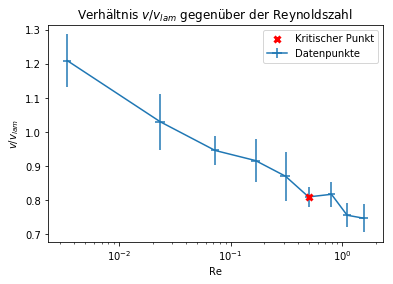

In [24]:
plt.errorbar(unumpy.nominal_values(Re_st), unumpy.nominal_values(v/v_lam_arr), \
             xerr=unumpy.std_devs(Re_st), yerr=unumpy.std_devs(v/v_lam_arr), \
            label='Datenpunkte')
plt.scatter(Re_st[3].n, (v/v_lam_arr)[3].n, marker='x', color='red', linewidth=3, zorder=10, label='Kritischer Punkt')
plt.title(r'Verhältnis $v/v_{lam}$ gegenüber der Reynoldszahl')
plt.xlabel('Re')
plt.ylabel(r'$v/v_{lam}$')
plt.xscale('log')
plt.legend()
#plt.savefig('v_vlam_und_Reynoldszahl.pdf', format='pdf')

In [25]:
print('Re = 0.5')

Re = 0.5


## Bestimmung der Zähigkeit nach Hagen-Poiseuille

Messwerte eintragen:

In [26]:
T_2 = ufloat(22.30, 0.10) #[C]
p_L = ufloat(986.50, 0.10) #[hPa]
d_k = ufloat(1.50, 0.01) #[mm]
L_k = ufloat(100.0, 0.5) #[mm]
h_A = ufloat(477, 1) #[mm]
h_E = ufloat(472, 1) #[mm]

Berechne Mittelwert der Flüssigkeitshöhe:

In [27]:
h = unumpy.uarray((h_A.nominal_value+h_E.n)/2,np.sqrt(2*1**2)) * 10**(-3) #[m]
h

0.47450000000000003+/-0.0014142135623730952

Trage die Messwerte für das Volumen in Abhängigkeit von der Zeit auf:

In [28]:
V = np.array(np.arange(5,30,5))

t = np.array([121.00, 272.82, 421.76, 572.58, 725.93])

print(V, t)

[ 5 10 15 20 25] [121.   272.82 421.76 572.58 725.93]


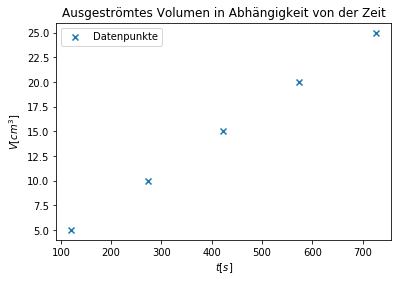

In [29]:
plt.scatter(t,V, marker='x', label='Datenpunkte')
plt.title('Ausgeströmtes Volumen in Abhängigkeit von der Zeit')
plt.xlabel(r'$t [s]$')
plt.ylabel(r'$V [cm^3]$')
plt.legend()

Führe Kurvenfit durch:

In [30]:
popt2, pcov2 = curve_fit(linear, t, V, p0=[1/20,0])

dVdt = unumpy.uarray(popt2[0], np.sqrt(pcov2[0][0])) #[cm^3/s]

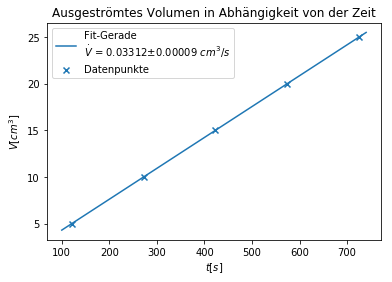

In [31]:
plt.scatter(t,V, marker='x', label='Datenpunkte')
plt.title('Ausgeströmtes Volumen in Abhängigkeit von der Zeit')
plt.xlabel(r'$t [s]$')
plt.ylabel(r'$V [cm^3]$')
plt.legend()
x_2=np.linspace(100,740)
plt.plot(x_2, linear(x_2,*popt2), label='Fit-Gerade \n' + r'$\dot{V}$' + ' = {:P}'.format(dVdt) + r' $cm^{3}/s$')
plt.legend()
#plt.savefig('Volumen_von_t.pdf', format='pdf')

In [32]:
rho_f_m = rho_f * 10**(3) #[kg/m^3]
r_k = d_k/2 * 10**(-3) #[m]
L_k_m = L_k * 10**(-3) #[m]
dVdt_m = dVdt * 10**(-6) #[m^3/s]

In [33]:
eta_hp = np.pi * (rho_f_m * scp.g * h)/(8 * dVdt_m * L_k_m) * (r_k)**4
print('{:P}'.format(eta_hp) + ' Pa * s')

0.200±0.005 Pa * s


---

Berechne Reynoldszahl:

In [34]:
Re_hp = (rho_f_m * (dVdt_m/(np.pi*r_k**2)) * r_k *2)/eta_hp
print("{:P}".format(Re_hp))

0.161±0.006


---

### Vergleich der Viskositäten

In [35]:
sigma_eta = abs(eta_st.n - eta_hp.n)/np.sqrt(eta_st.s**2 + eta_hp.s**2)
print(sigma_eta)

1.7974749953985878
